ASSIGNMENT NUMBER 1
In this assignment, you will solve a problem, i.e., Chaky company makes some car but he has
difficulty setting the price for the car. Please make a simple web-based car price prediction system.
Note: You are ENCOURAGED to work with your friends, but DISCOURAGED to blindly copy
other’s work. Both parties will be given 0.
Note: Comments should be provided sufficiently so we know you understand. Failure to do so can
raise suspicion of possible copying/plagiarism.
Note: You will be graded upon (1) documentation, (2) experiment, (3) implementation.
Note: This is a two-weeks assignment, but start early.
Deliverables: The GitHub link containing the jupyter notebook, a README.md of the github, and
the folder of your web application called ‘app’.

***************************************************************************************************

Task 1. Preparing the datasets
Download the Car Price dataset from Google classroom. 
Perform loading, 
EDA, 
preprocessing,
model selection, · · · , inference.

There are some important coding considerations:
• For the feature owner, map First owner to 1, ..., Test Drive Car to 5
• For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol 
• For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: use
df.mileage.str.split
• For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
• Do the same for max power
• For the feature brand, take only the first word and remove the rest
• Drop the feature torque, simply because Chaky’s company does not understand well about it 
• You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to involve
  this, we will simply delete all samples related to it.
• Since selling price is a big number, it can cause your prediction to be very unstable. One trick is
  to first transform the label using log transform, i.e., y = np.log(df['selling_price'])
• During inference/testing, you have to transform your predicted y backed before comparing with y
test, i.e., pred_y = np.exp(pred_y)

**********************************************************************************************

Task 2. Report - In the end of the notebook, please write a 2-3 paragraphs summary deeply
discussing and analysing the results. Possible points of discussion:
• Which features are important? Which are not? Why?
• Which algorithm performs well? Which does not? Why? (here, you haven’t learned about any
algorithms yet, but you can search online a bit and start building an intuition)

**********************************************************************************************

Task 3. Deployment - Develop a web-based application that contains the model. Here you will be
tasked to self-study how to deploy the model into production. Here are some guidelines: Here you
have multiple options. Those who are veteran web developer may prefer their own web app stack
which is welcomed. For those who are new to this realm, you may consider a simpler/one-stop
solution rather than learning the traditional/flexible approach.
The goal of this task is to expose/deploy our model for public use via the web interface. The main
scenario is the following:
1) Users enter the domain on their browser. They land on your page.
2) (optional) Users may need to navigate to a prediction page.
3) Users read the instruction given on the page that instructs them on how the prediction
works. 4) Users find the input form, put in the appropriate data, and click submit.
5) Note that if users do not have information on certain field, you have to allow users to skip that
field. In that case, we recommend you to fill the missing field with imputation technique you
have learned in the class.
6) A moment later (depending on your model and hardware performance), the result is returned
and printed below the form.
Deploying aside, the app should work on the local environment (your machine) first. I would suggest
you use ‘Dash’ by ‘Plotly’ https://dash.plotly.com/ as a one-stop solution. Spend time studying the
‘Quick Start’ tutorial on the site and also ‘Dash Fundamental’. They are essential for you to know how
‘Dash’ works.
The deliverable for the app would be, in GitHub, you have a folder ‘app’ with ‘.Dockerfile’, ‘docker
compose.yaml’ files, and ‘code’ folder.
Bootstrap: I know Dockerizing the app could be difficult for newcomers, you will get confused when
searching for stuff online, especially, when you just trust ChatGPT to give you the right answer. So, for
those who want to postpone the process of learning “Docker”, here is the Dockerized Dash project
link. Don’t worry, you will eventually need to do this yourself in this shortcoming weeks. You can not
escape this.

Loading the data set:

In [1]:
import pandas as pd
df_cars=pd.read_csv('Cars.csv')

Checking the created data set: (number of samples (rows), number of variables (columns), column names):

In [2]:
df_cars.shape

(8128, 13)

In [3]:
df_cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [4]:
df_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


coding feature "owner": First Owner --> 1, Second Owner --> 2, Third owner --> 3, Fourth & Above Owner --> 4, Test Drive Car --> 5: 

In [5]:
owner_coding = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df_cars['owner'] = df_cars['owner'].map(owner_coding)

Remove rows with fuel values 'CNG' or 'LPG':

In [6]:
df_cars = df_cars[df_cars['fuel'].isin(['Petrol', 'Diesel'])]

Removing “kmpl” for the feature mileage, and convert the column to numerical type (e.g., float). 
Removing “CC” for the feature engine,  and convert the column to numerical type (e.g., float)
Removing “bph” for the feature engine,  and convert the column to numerical type (e.g., float)
for max_power, there is a single value that is equal to 'bph', to get a correct result the value is changed to ' bph'

In [7]:
df_cars.mileage = df_cars.mileage.str.split(expand=True)[0].astype(float)

In [8]:
df_cars.engine = df_cars.engine.str.split(expand=True)[0].astype(float)

In [9]:
df_cars.loc[df_cars['max_power'] == 'bph', 'max_power'] = ' bph'

In [10]:
df_cars.max_power = df_cars.max_power.str.split(expand=True)[0].astype(float)

Taking only the first word and removing the rest For the feature brand:

In [11]:
df_cars.name=df_cars.name.str.split(expand=True)[0]

Droping the feature torque:

In [12]:
df_cars = df_cars.drop(columns=['torque'])

Deleting all samples related to "Test Drive Cars == 5":

In [13]:
df_cars = df_cars[df_cars['owner'] != 5]

Transforming selling price by log transform function since selling price is a big number. y = np.log(df['selling_price']):

In [14]:
import numpy as np
df_cars['selling_price'] = np.log(df_cars['selling_price'])

As it is likely that the producing year of cars to be important for predicting the car's price, a new variable age is created to use as a feuture:

In [15]:
from datetime import datetime
now = datetime.now()
df_cars['car_age'] = int(now.strftime("%Y")) - df_cars['year']

Final check for loaded car data set structure:

In [16]:
df_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,9
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,9
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,17
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,13
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,16


In [17]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
 12  car_age        8028 non-null   int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 878.1+ KB


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [20]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.25.2', '2.0.3', '0.12.2', '3.7.2')

# 2. Exploratory Data Analysis

In [21]:
desc_num = df_cars.describe(include=['float', 'int'])
desc_str = df_cars.describe(include=['object'])

In [22]:
desc_str

,name,fuel,seller_type,transmission
count,8028,8028,8028,8028
unique,32,2,3,2
top,Maruti,Diesel,Individual,Manual
freq,2378,4401,6673,6982


In [23]:
desc_num

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,car_age
count,8028.000000,8028.000000,8.028000e+03,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000,8028.000000
mean,2013.815521,12.979337,6.977314e+04,1.458022,19.391962,1462.914640,91.819726,5.421551,9.184479
std,4.030836,0.838039,5.664419e+04,0.715283,4.001972,504.759742,35.804513,0.963125,4.030836
min,1983.000000,10.308919,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000,3.000000
25%,2011.000000,12.468437,3.500000e+04,1.000000,16.780000,1197.000000,68.850000,5.000000,6.000000
50%,2015.000000,13.017003,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000,8.000000
75%,2017.000000,13.429848,9.800000e+04,2.000000,22.320000,1582.000000,102.000000,5.000000,12.000000
max,2020.000000,16.118096,2.360457e+06,4.000000,42.000000,3604.000000,400.000000,14.000000,40.000000


Horizental Count Plot (Bar plot) is created for each categorical features to explore their distribution and any unusual values. 

<Axes: xlabel='count', ylabel='name'>

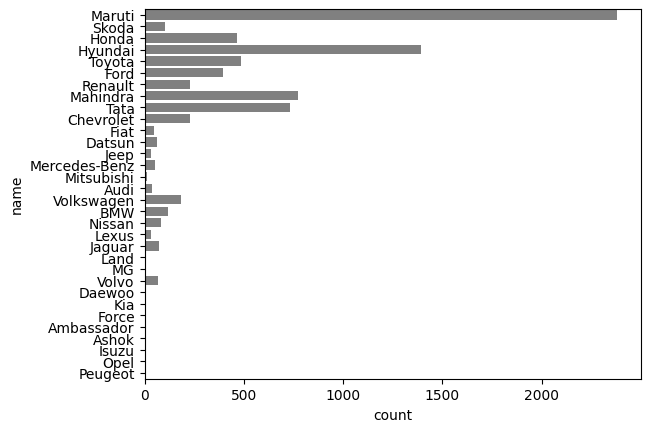

In [64]:
sns.countplot(data = df_cars, y = 'name', color = 'Grey')

<Axes: xlabel='count', ylabel='fuel'>

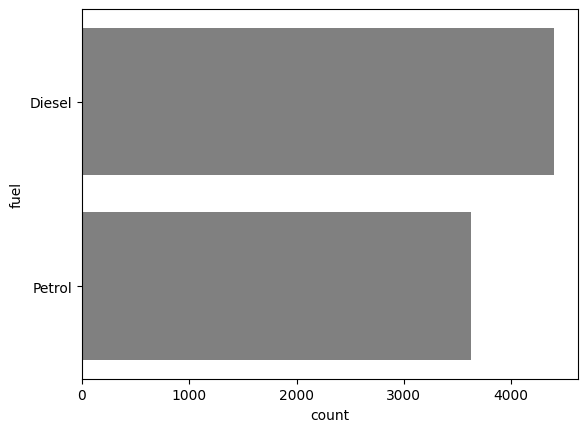

In [65]:
sns.countplot(data = df_cars, y = 'fuel', color = 'Grey')

<Axes: xlabel='count', ylabel='seller_type'>

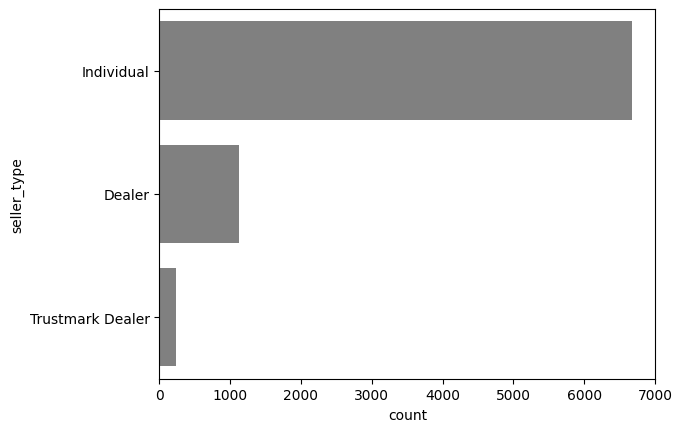

In [66]:
sns.countplot(data = df_cars, y = 'seller_type', color = 'Grey')

<Axes: xlabel='count', ylabel='transmission'>

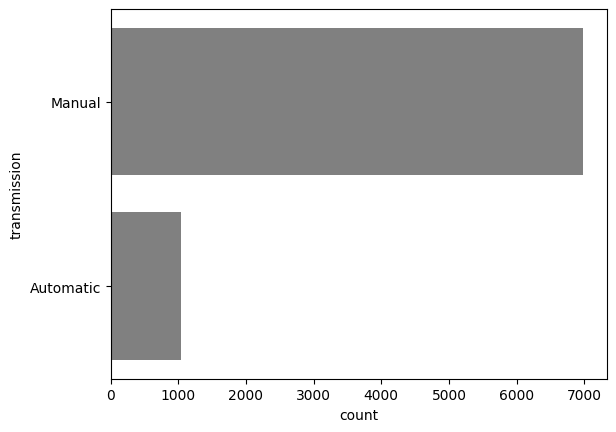

In [67]:
sns.countplot(data = df_cars, y = 'transmission', color = 'Grey')

<Axes: xlabel='count', ylabel='owner'>

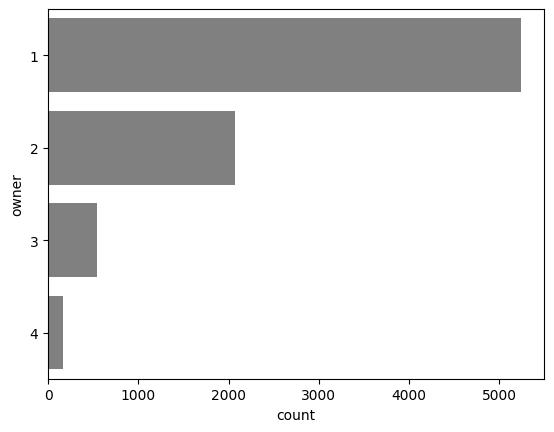

In [73]:
sns.countplot(data = df_cars, y = 'owner', color = 'Grey')

<Axes: xlabel='count', ylabel='seats'>

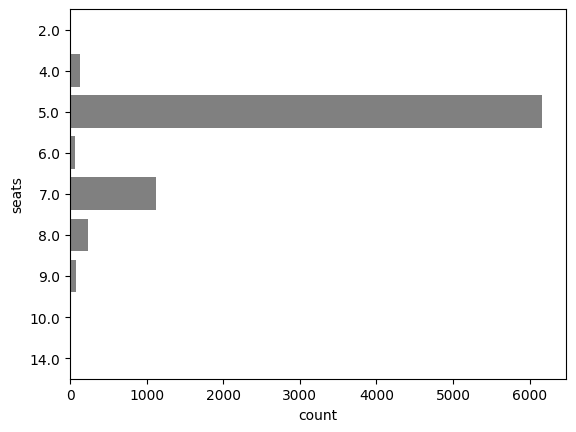

In [74]:
sns.countplot(data = df_cars, y = 'seats', color = 'grey')

Distribution Plot (Histogram) is useful to see how continues label and features are distributed. also we can find any deviation from a normal distribution e.g. outliers, unusual observation, skewness or kurtosis can be found from these plots, furthermore we can use these plots to find the appropriate measure for imputing missing data. however outlier detection and imputation will be done in the preprecessing phase.  

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


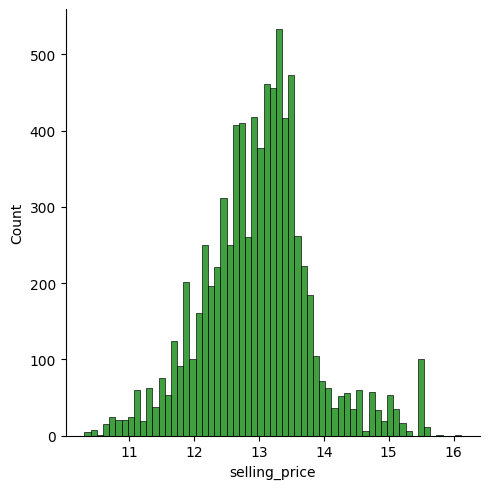

In [62]:
sns.displot(data = df_cars, x = 'selling_price', color = 'Green')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


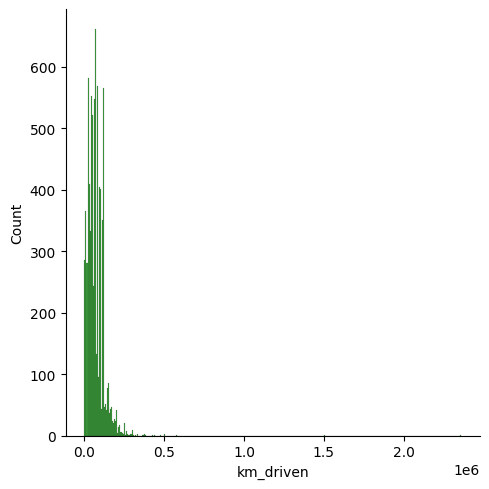

In [75]:
sns.displot(data = df_cars, x = 'km_driven', color = 'Green')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


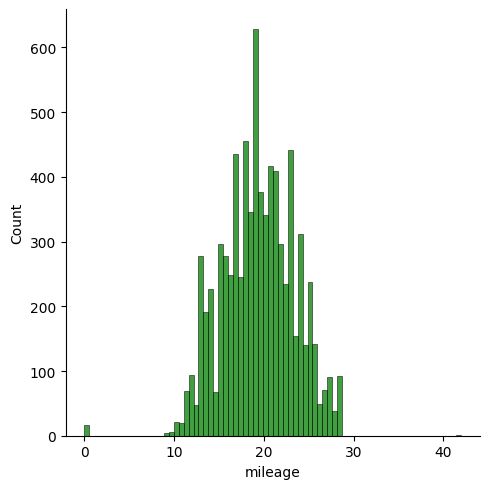

In [76]:
sns.displot(data = df_cars, x = 'mileage', color = 'Green')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


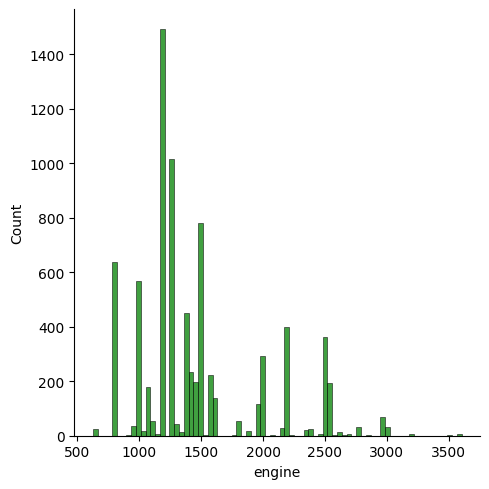

In [77]:
sns.displot(data = df_cars, x = 'engine', color = 'Green')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


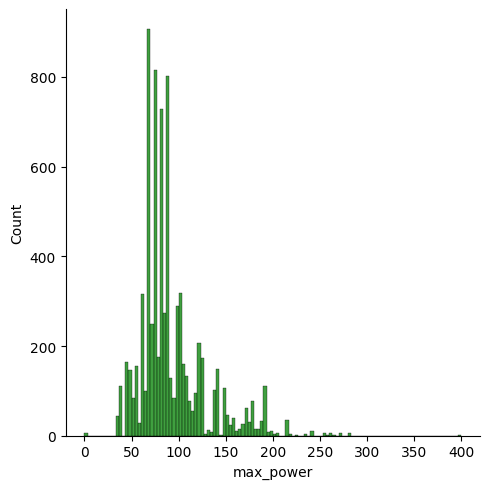

In [78]:
sns.displot(data = df_cars, x = 'max_power', color = 'Green')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


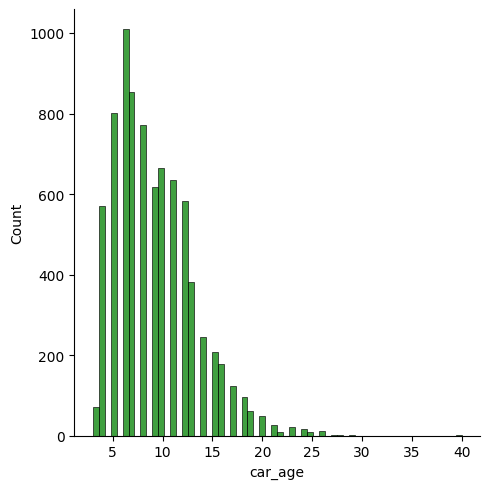

In [79]:
sns.displot(data = df_cars, x = 'car_age', color = 'Green')

In [ ]:
sns.boxplot(x = df_cars["fuel"], y = df_cars["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Fuel Type")

In [ ]:
sns.scatterplot(x = df_cars['car_age'], y = df_cars['selling_price'], hue=df_cars['owner'], size = df_cars['engine'], style=df_cars['fuel'])